In [9]:
import pandas as pd
import numpy as np 

In [11]:
# sklearn에서 캘리포니아 집값 예측 데이터셋 가져오기
from sklearn.datasets import fetch_california_housing

# numpy에서 소수점 4째 자리까지만 출력
np.set_printoptions(precision=4, suppress=True)

data = fetch_california_housing()

In [12]:
# data의 특성을 확인
# 행의 갯수 : 20640
# 열의 특성 : 8 numeric
#print(data['DESCR'])

MedInc	: 구역 내 가구의 중간 소득 <br>
HouseAge :	구역 내 주택 연령의 중간값 <br>
AveRooms :	가구당 평균 방 개수<br>
AveBedrms :	가구당 평균 침실 개수<br>
Population :	구역 내 총 인구수<br>
AveOccup :	가구당 평균 인원수<br>
Latitude :	구역의 위도<br>
Longitude : 	구역의 경도<br>

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import urllib.request

# 캘리포니아 지도 이미지 다운로드 (GitHub에서 바로 다운로드)
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/images/end_to_end_project/california.png"
filename = "california.png"
print("Downloading california.png...")
urllib.request.urlretrieve(url, filename)
california_img = mpimg.imread(filename)

# 지도 시각화
ax = df.plot(kind="scatter", x="Longitude", y="Latitude", figsize=(10,7),
             s=df['Population']/100, label="Population",
             c="MedHouseVal", cmap=plt.get_cmap("jet"),
             colorbar=False, alpha=0.4)

# 지도 이미지 오버레이 (coordinates based on the image extent)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

# 가격 컬러바 추가
prices = df["MedHouseVal"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%.1f k"%(v) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

NameError: name 'df' is not defined

In [14]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df["MedHouseVal"] = data.target

In [15]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### 데이터 분할

In [16]:
# train_test_split
from sklearn.model_selection import train_test_split

# 데이터셋 분할
data_train, data_test, target_train, target_test = train_test_split(df.drop("MedHouseVal", axis=1), df["MedHouseVal"], test_size=0.2, random_state=42)

# 데이터셋 확인
print("Training set size:", len(data_train))
print("Test set size:", len(data_test))


Training set size: 16512
Test set size: 4128


In [21]:
# 회귀에 대한 평가 지표
# MSE, RMSE, MAE    Kaggle에서 보면 다양한 평기 지표(log)
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

# plot predictions : 예측값과 실제값을 산점도로 비교하여 시각화
def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': actual})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

# mse 기준으로 모델의 성능 평가를 해주는 함수
def mse_eval(name_, pred, actual):
    global predictions
    global colors

    # 산점도를 그려주고(예측값, 정답값)
    plot_predictions(name_, pred, actual)

    # mse 계산 출력
    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    # 모델별 성능을 비교하기 위해 sorted
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df)
    
    # 모델들을 비교해서 barh로 그려준다.
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

# 리스트에 있는 모델 중에 하나를 삭제하는 함수
def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

# Model 1. LinearRegression

In [22]:
from sklearn.linear_model import LinearRegression

$$\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_4 x_4 + \beta_5 x_5 + \beta_6 x_6 + \beta_7 x_7 + \beta_8 x_8$$

$$\mathbf{ h_\theta(x_{i}) = \theta_0+\theta_1 MedInc + \theta_2 HouseAge + \theta_3 AveRooms + \theta_4 AveBedrms + \theta_5 Population + \theta_6 AveOccup + \theta_7 Latitude + \theta_8 Longitude }$$

In [23]:
# data_train, data_test, target_train, target_test

# 1. 모델 생성
model = LinearRegression()

# 2. 모델 학습
model.fit(data_train, target_train)

# 3. 모델 예측 : 예측값을 받아올 때
y_pred = model.predict(data_test)

# 4. 모델 평가
mse = mean_squared_error(target_test, y_pred)

In [25]:
print(model.coef_)
print(model.intercept_)

[ 0.4487  0.0097 -0.1233  0.7831 -0.     -0.0035 -0.4198 -0.4337]
-37.02327770606416


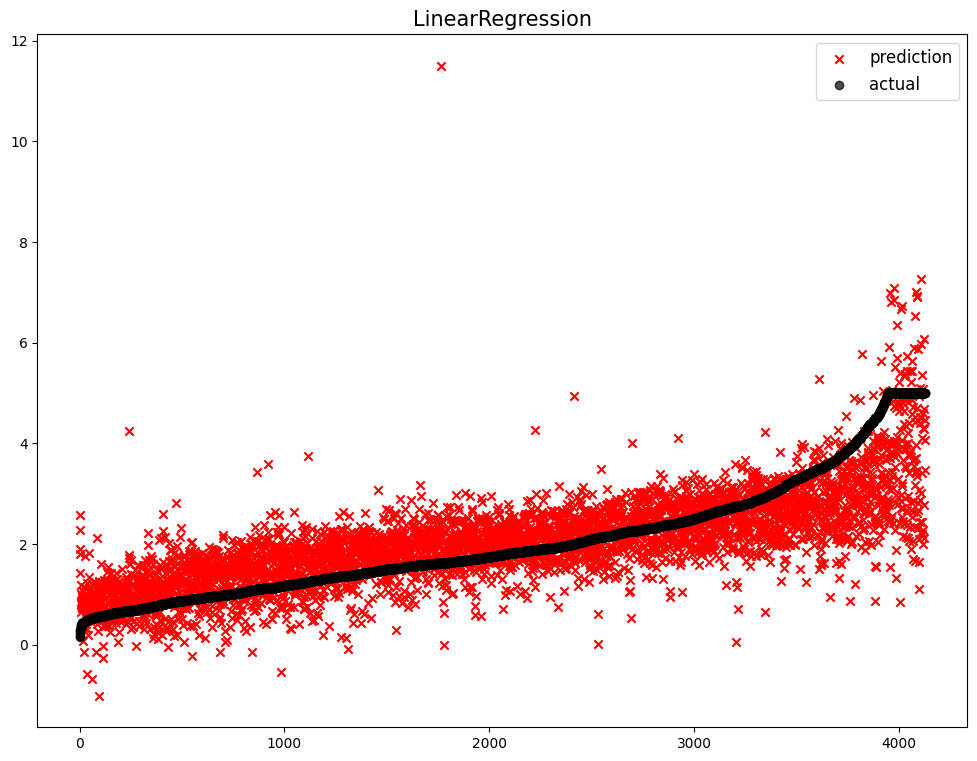

              model       mse
0  LinearRegression  0.555892


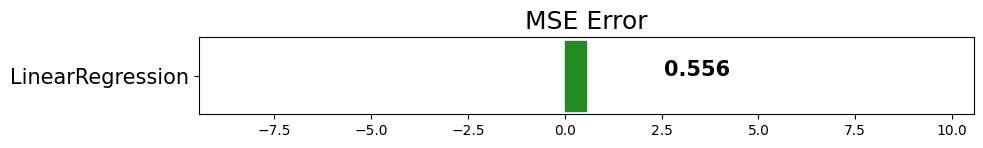

In [24]:
# mse_eval 함수를 사용 : 모델을 리스트에 추가할 때 모델명
mse_eval('LinearRegression', y_pred, target_test)

# 규제(Regularization = penalty)

L1 penalty, L2 penalty

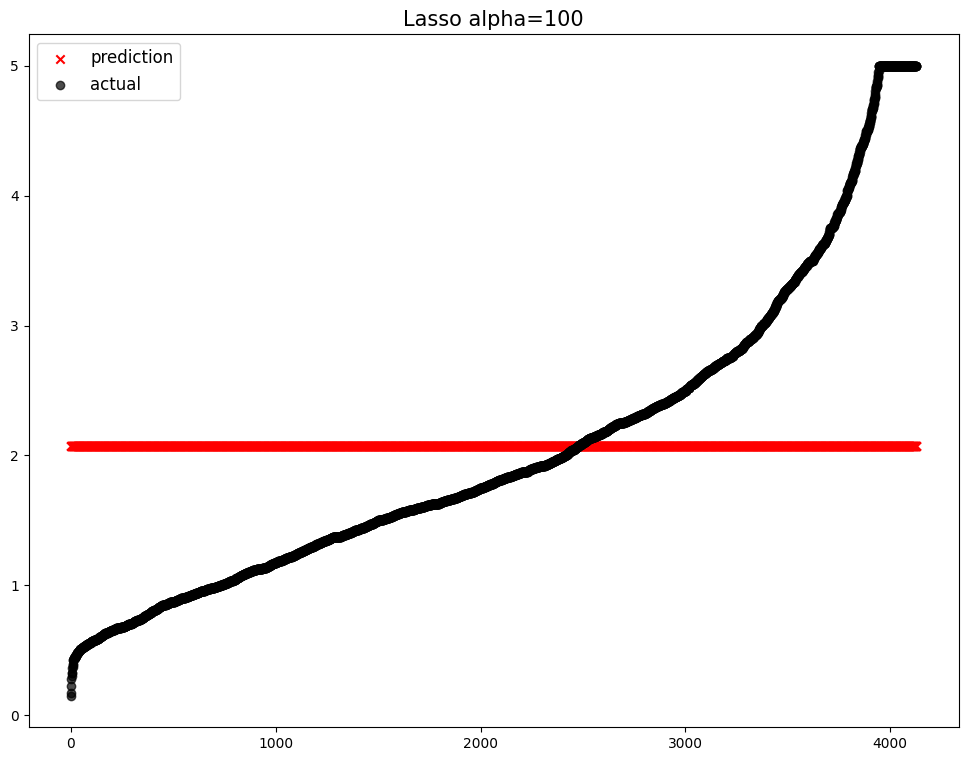

                model       mse
0     Ridge alpha=100  1.310696
1     Lasso alpha=100  1.310696
2      Ridge alpha=10  1.310227
3       Ridge alpha=1  0.938034
4     Ridge alpha=0.1  0.613512
5    LinearRegression  0.555892
6  Ridge alpha=0.0001  0.555683
7   Ridge alpha=0.001  0.553894
8    Ridge alpha=0.01  0.544449


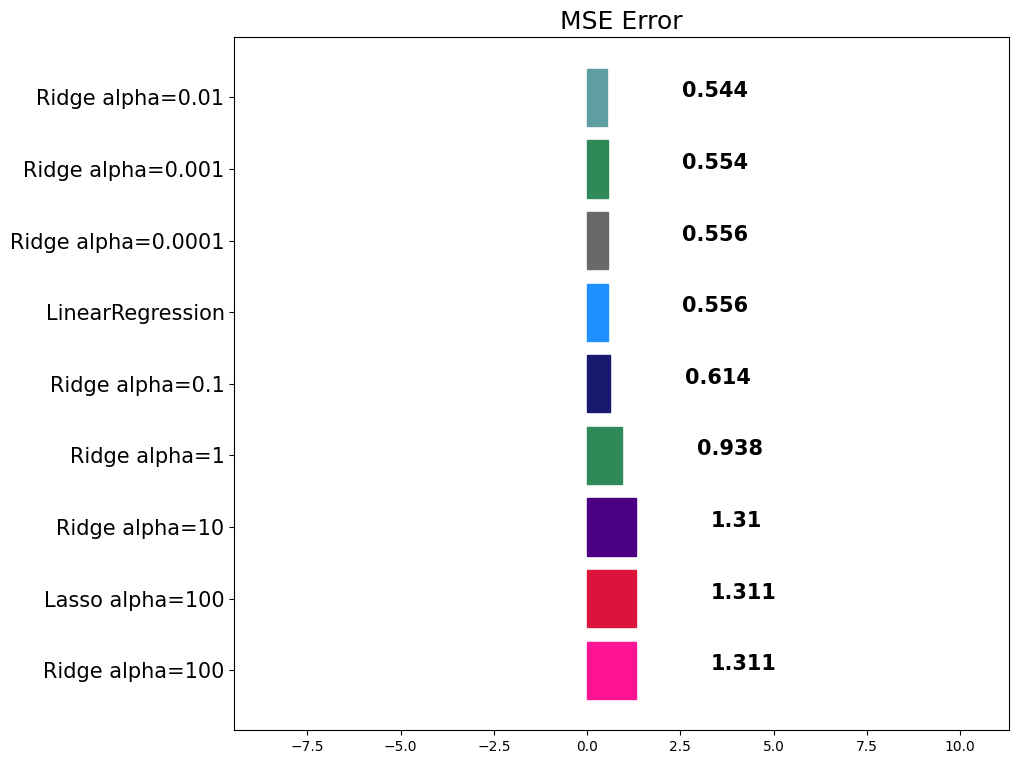

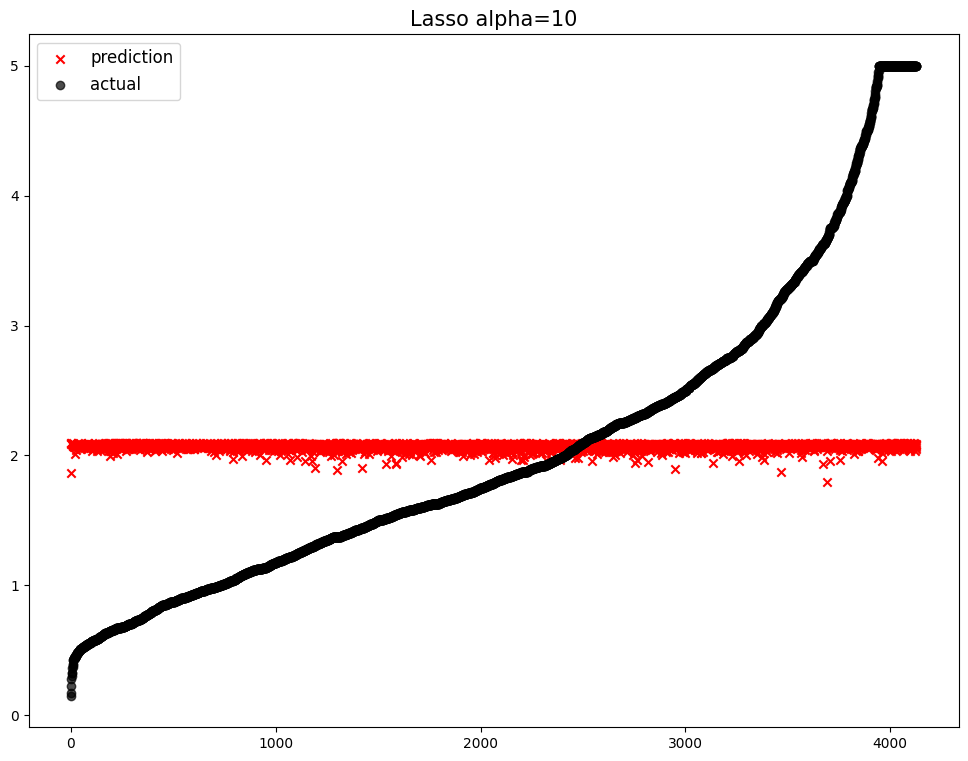

                model       mse
0     Ridge alpha=100  1.310696
1     Lasso alpha=100  1.310696
2      Ridge alpha=10  1.310227
3      Lasso alpha=10  1.310227
4       Ridge alpha=1  0.938034
5     Ridge alpha=0.1  0.613512
6    LinearRegression  0.555892
7  Ridge alpha=0.0001  0.555683
8   Ridge alpha=0.001  0.553894
9    Ridge alpha=0.01  0.544449


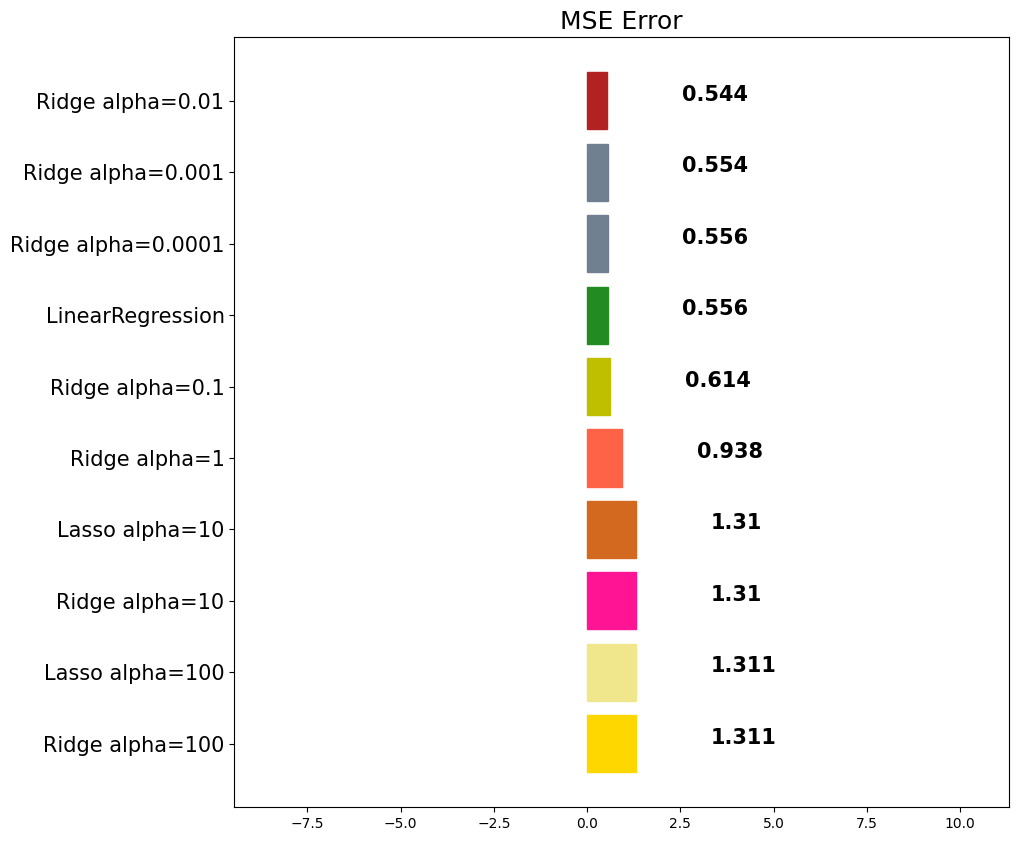

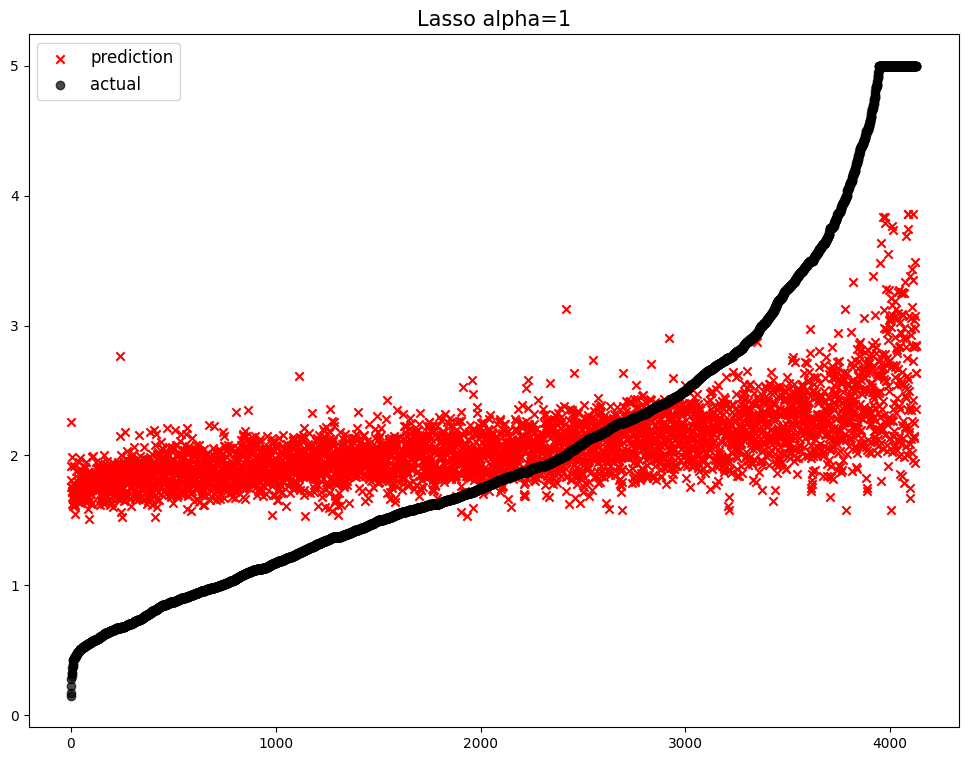

                 model       mse
0      Ridge alpha=100  1.310696
1      Lasso alpha=100  1.310696
2       Ridge alpha=10  1.310227
3       Lasso alpha=10  1.310227
4        Ridge alpha=1  0.938034
5        Lasso alpha=1  0.938034
6      Ridge alpha=0.1  0.613512
7     LinearRegression  0.555892
8   Ridge alpha=0.0001  0.555683
9    Ridge alpha=0.001  0.553894
10    Ridge alpha=0.01  0.544449


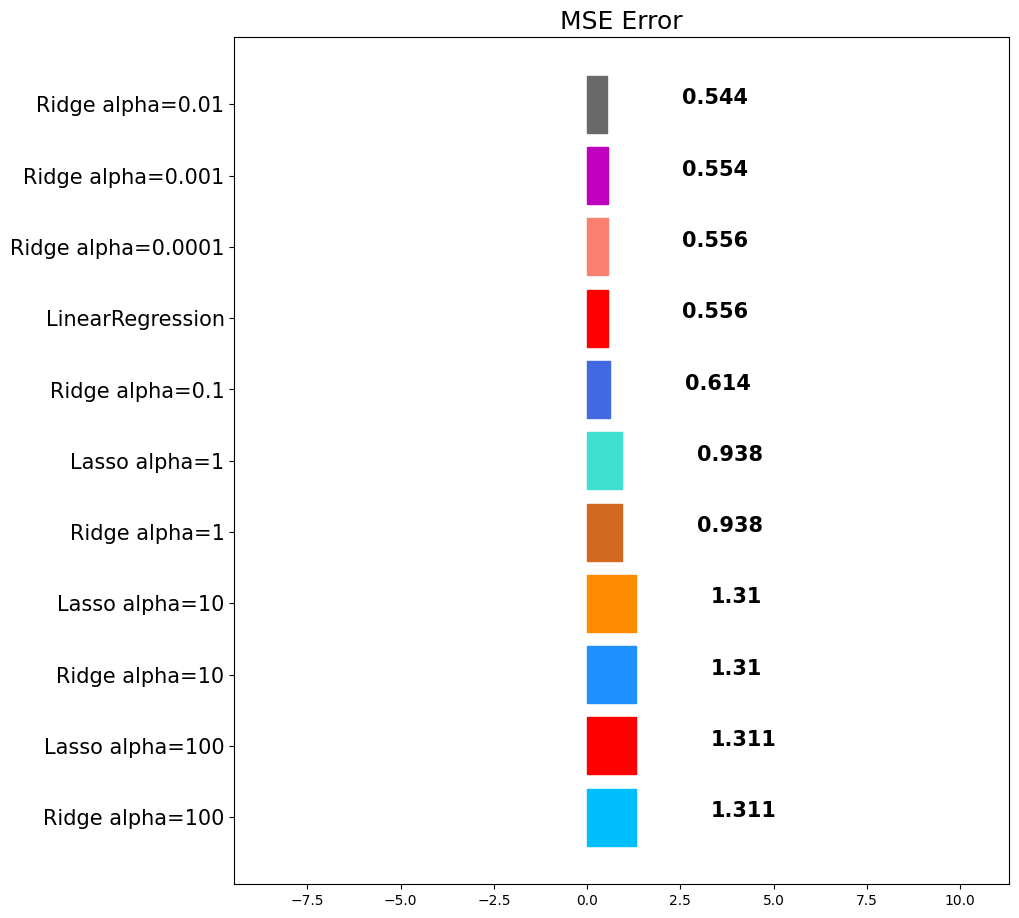

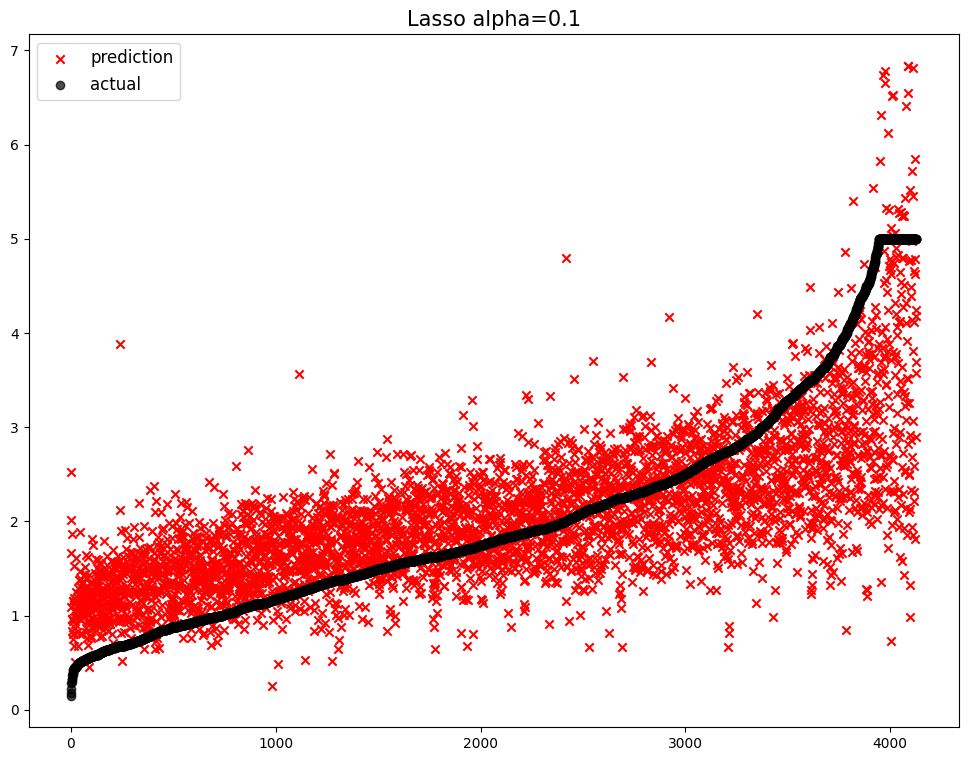

                 model       mse
0      Ridge alpha=100  1.310696
1      Lasso alpha=100  1.310696
2       Ridge alpha=10  1.310227
3       Lasso alpha=10  1.310227
4        Ridge alpha=1  0.938034
5        Lasso alpha=1  0.938034
6      Ridge alpha=0.1  0.613512
7      Lasso alpha=0.1  0.613512
8     LinearRegression  0.555892
9   Ridge alpha=0.0001  0.555683
10   Ridge alpha=0.001  0.553894
11    Ridge alpha=0.01  0.544449


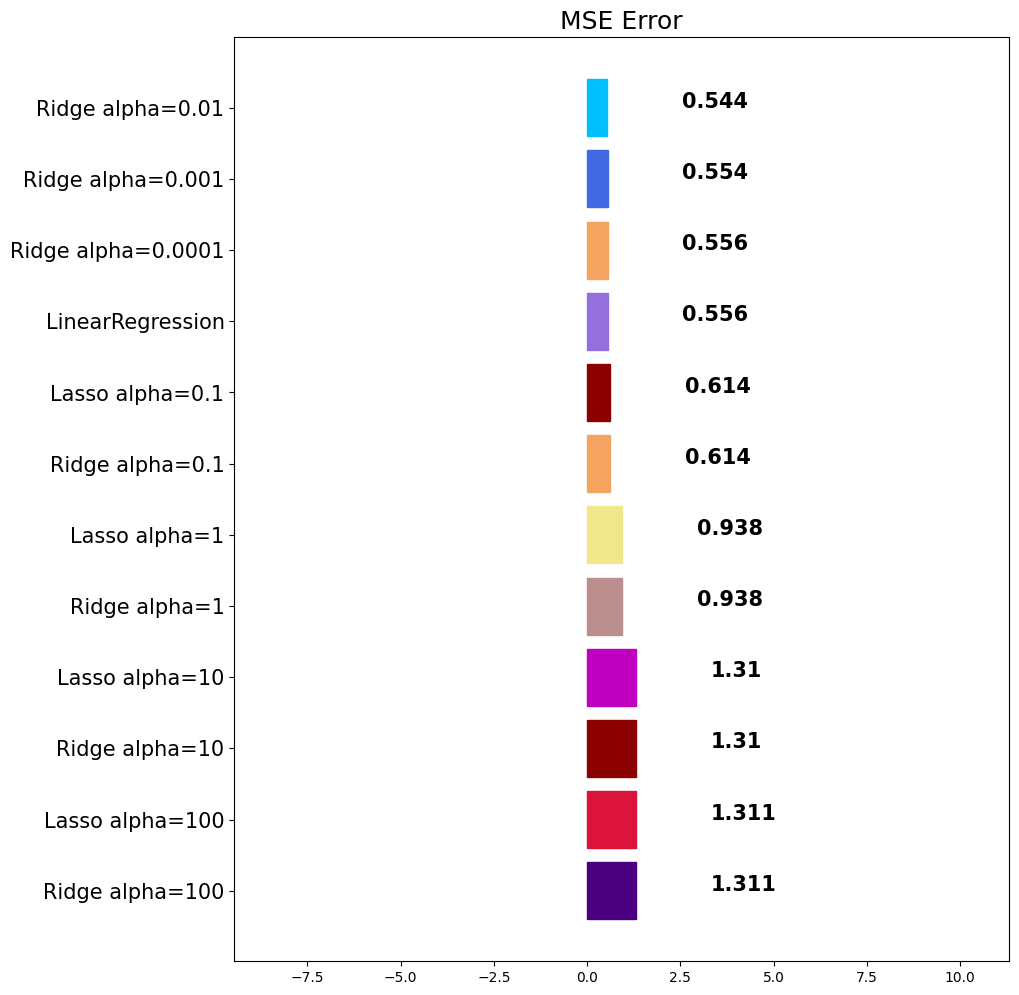

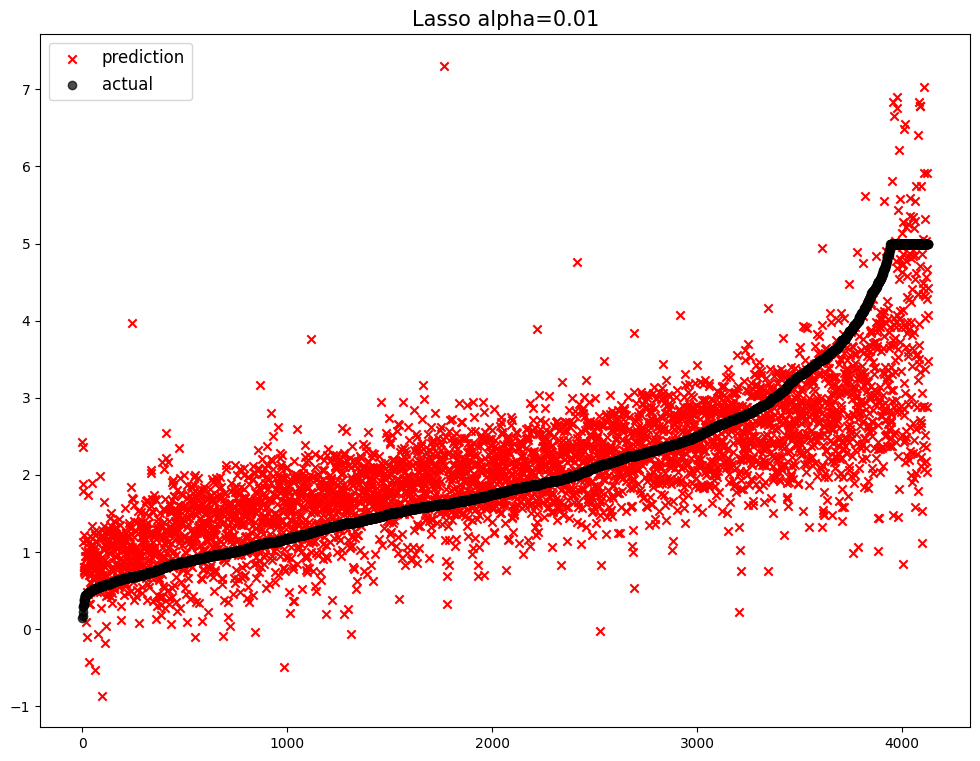

                 model       mse
0      Ridge alpha=100  1.310696
1      Lasso alpha=100  1.310696
2       Ridge alpha=10  1.310227
3       Lasso alpha=10  1.310227
4        Ridge alpha=1  0.938034
5        Lasso alpha=1  0.938034
6      Ridge alpha=0.1  0.613512
7      Lasso alpha=0.1  0.613512
8     LinearRegression  0.555892
9   Ridge alpha=0.0001  0.555683
10   Ridge alpha=0.001  0.553894
11    Ridge alpha=0.01  0.544449
12    Lasso alpha=0.01  0.544449


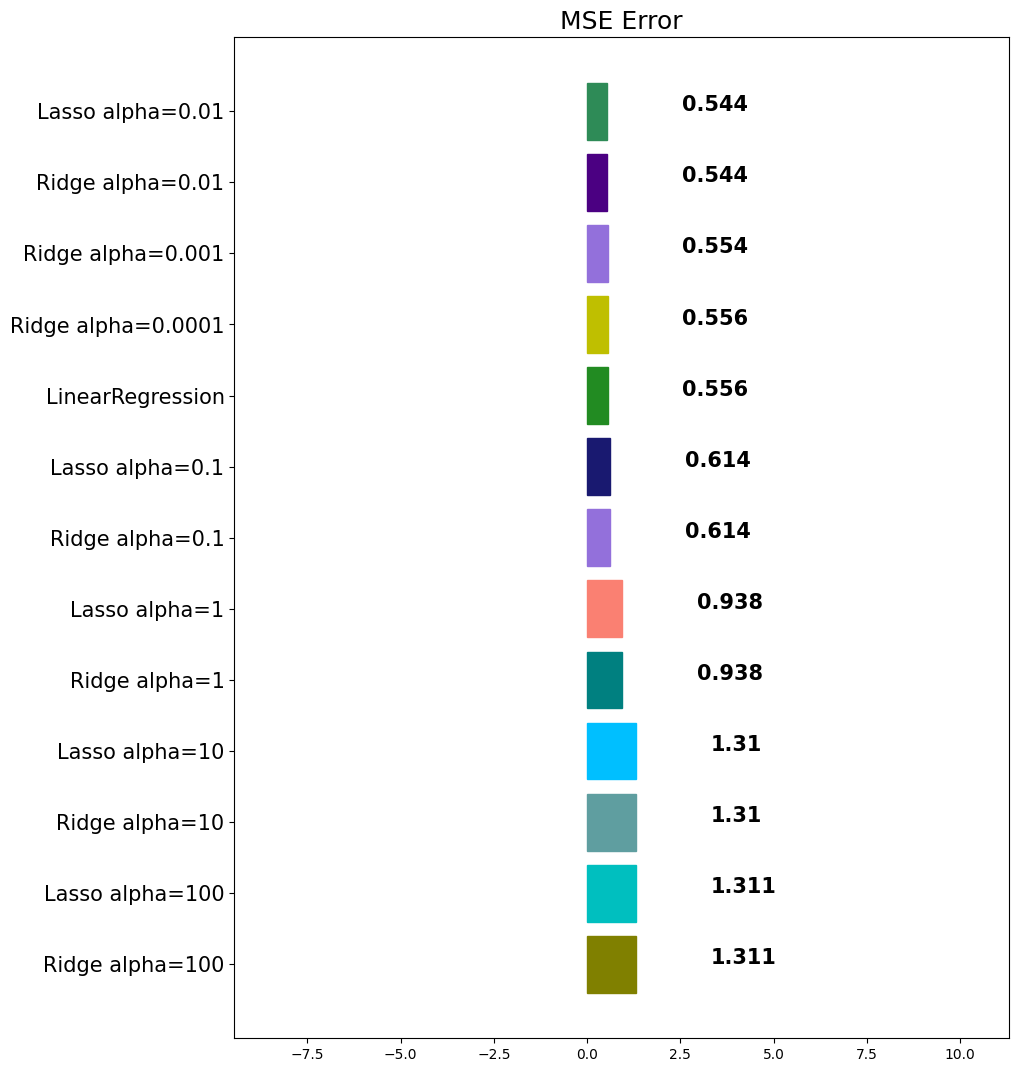

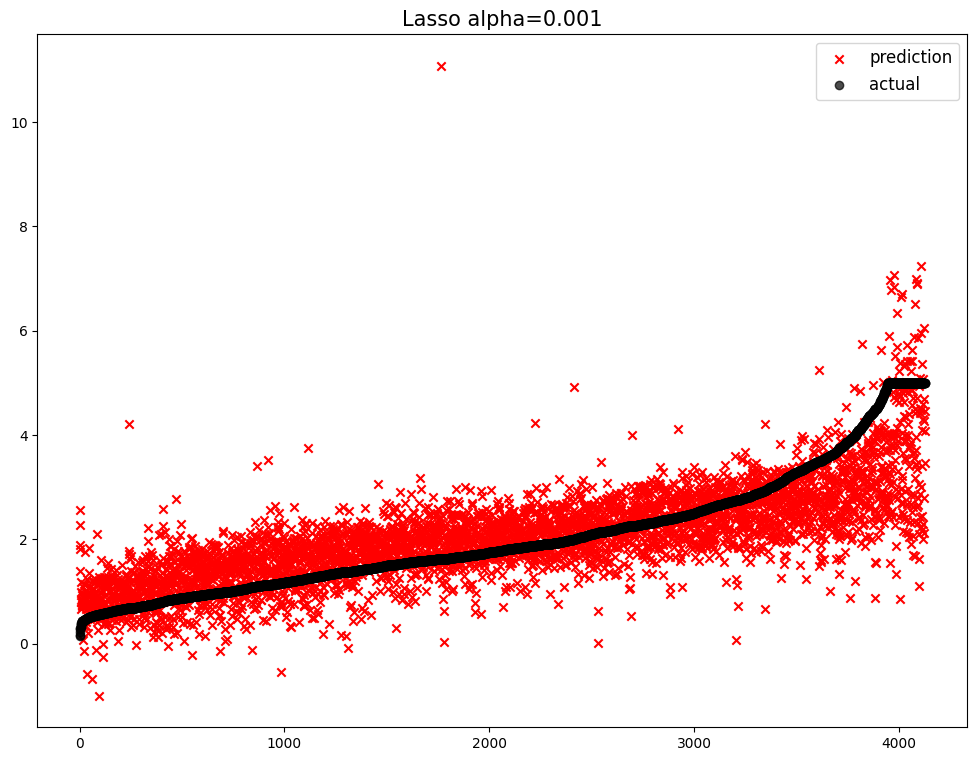

                 model       mse
0      Ridge alpha=100  1.310696
1      Lasso alpha=100  1.310696
2       Ridge alpha=10  1.310227
3       Lasso alpha=10  1.310227
4        Ridge alpha=1  0.938034
5        Lasso alpha=1  0.938034
6      Ridge alpha=0.1  0.613512
7      Lasso alpha=0.1  0.613512
8     LinearRegression  0.555892
9   Ridge alpha=0.0001  0.555683
10   Ridge alpha=0.001  0.553894
11   Lasso alpha=0.001  0.553894
12    Ridge alpha=0.01  0.544449
13    Lasso alpha=0.01  0.544449


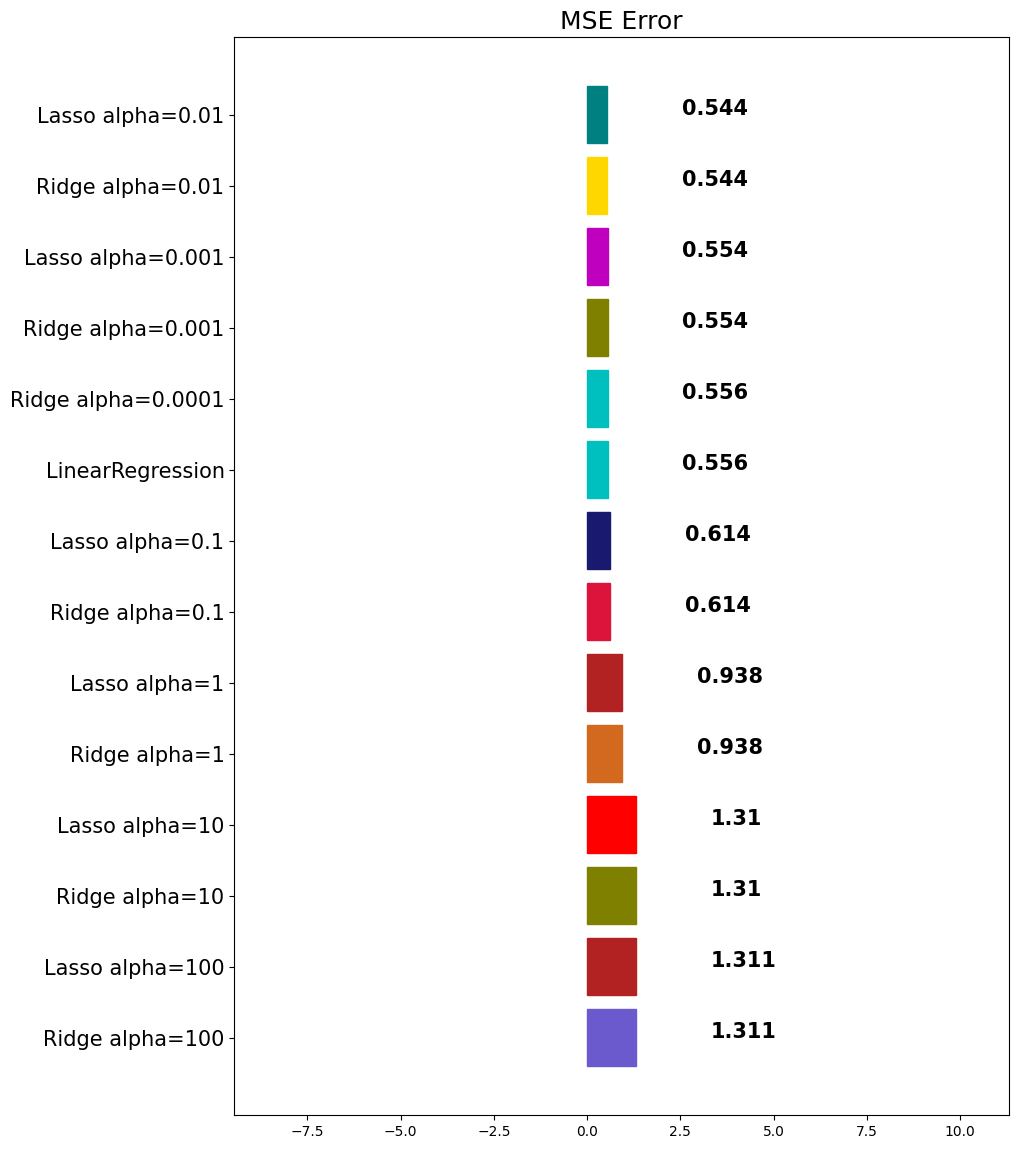

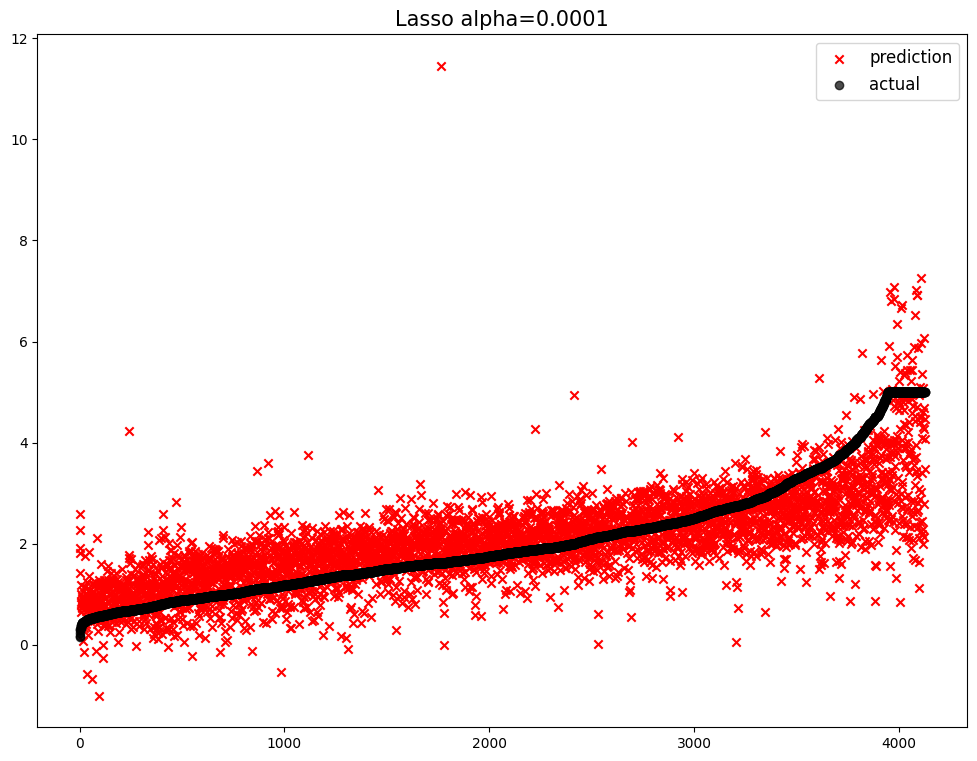

                 model       mse
0      Ridge alpha=100  1.310696
1      Lasso alpha=100  1.310696
2       Ridge alpha=10  1.310227
3       Lasso alpha=10  1.310227
4        Ridge alpha=1  0.938034
5        Lasso alpha=1  0.938034
6      Ridge alpha=0.1  0.613512
7      Lasso alpha=0.1  0.613512
8     LinearRegression  0.555892
9   Ridge alpha=0.0001  0.555683
10  Lasso alpha=0.0001  0.555683
11   Ridge alpha=0.001  0.553894
12   Lasso alpha=0.001  0.553894
13    Ridge alpha=0.01  0.544449
14    Lasso alpha=0.01  0.544449


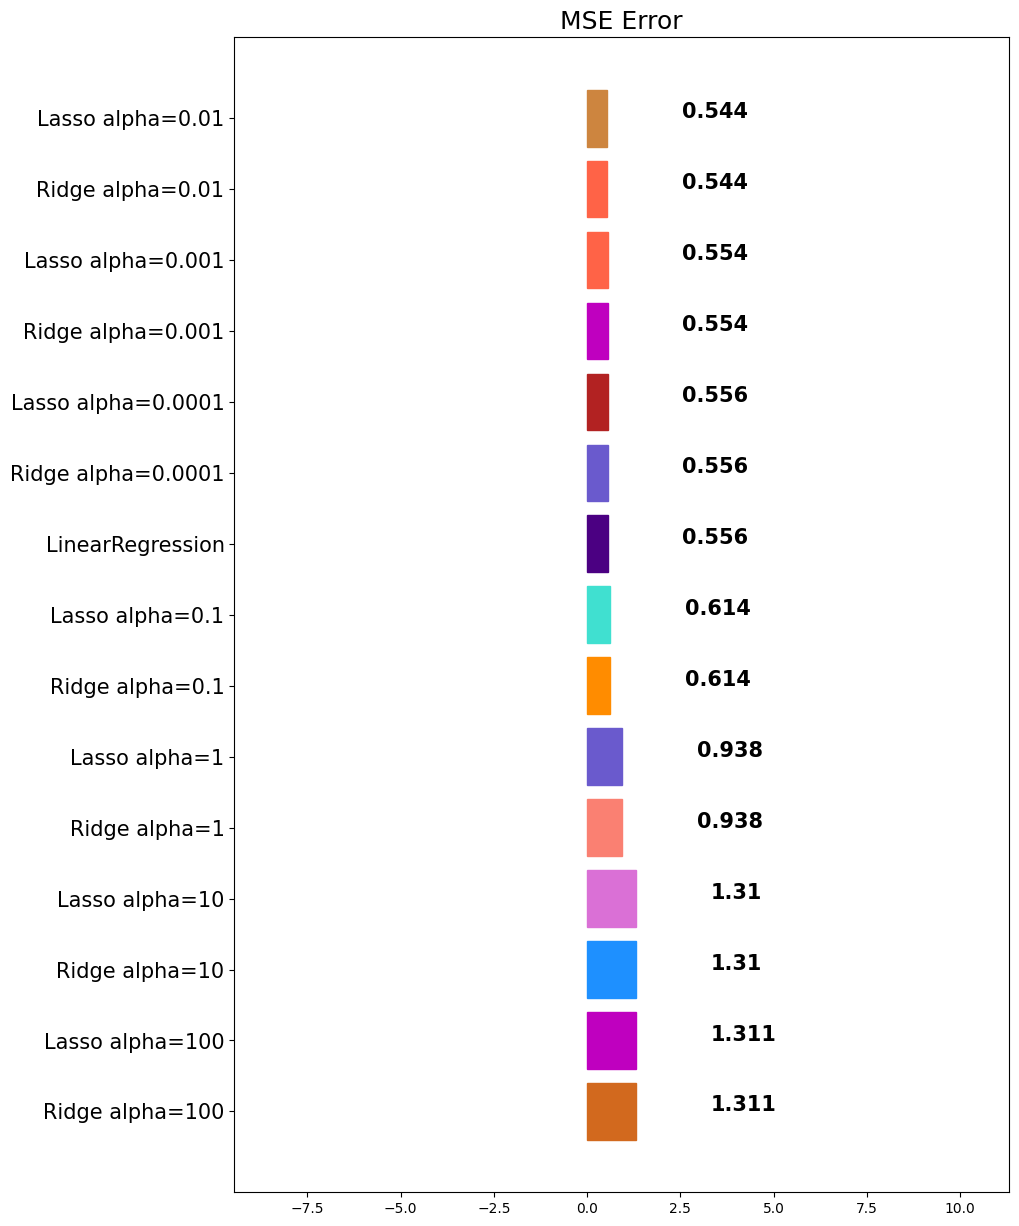

In [27]:
# Lasso Regression : L1 penalty
# Ridge Regression : L2 penalty
from sklearn.linear_model import Ridge, Lasso

alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

for alpha in alphas:
    # 1. 모델 생성
    model = Lasso(alpha=alpha)
    # 2. 모델 학습
    model.fit(data_train, target_train)
    # 3. 모델 예측
    y_pred = model.predict(data_test)
    # 4. 모델 평가
    mse = mean_squared_error(target_test, y_pred)
    mse_eval(f'Lasso alpha={alpha}', y_pred, target_test)

In [ ]:
df.columns

In [28]:
def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)
    
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

In [ ]:
lasso_100 = Lasso(alpha=100)
lasso_100.fit(data_train, target_train)
lasso_pred_100 = lasso_100.predict(data_test)

lasso_001 = Lasso(alpha=0.01)
lasso_001.fit(data_train, target_train)
lasso_pred_001 = lasso_001.predict(data_test)

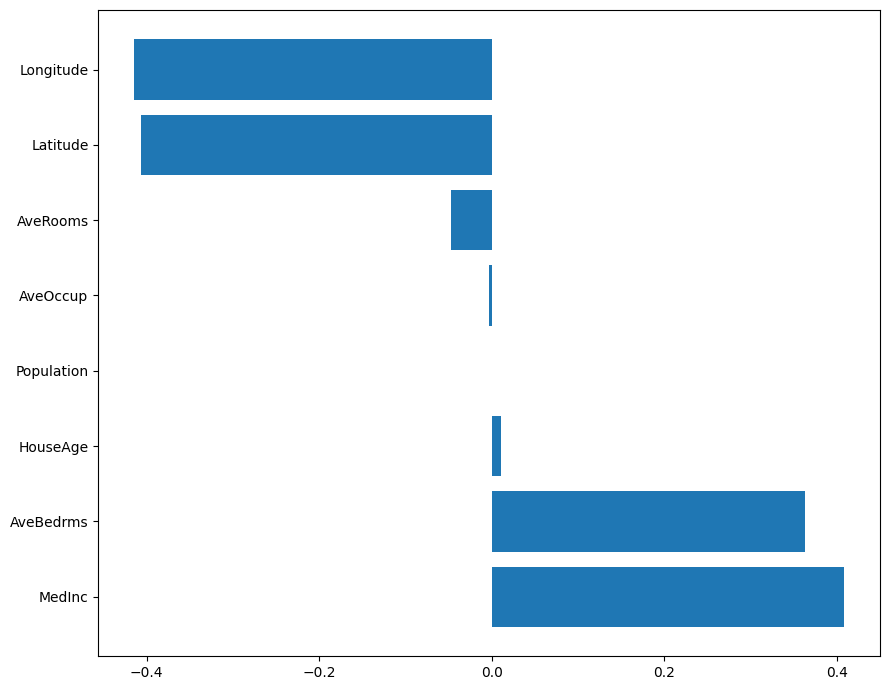

In [30]:
plot_coef(data_train.columns, lasso_001.coef_)

Lasso + Ridge -> ElasticNet

l1_ratio (default=0.5)
* l1_ratio = 0 (L2 규제만 사용)
* l1_ratio = 1 (L1 규제만 사용)
* 0 < l1_ratio < 1 (L1 and L2 규제의 혼합 사용)

In [31]:
from sklearn.linear_model import ElasticNet

ratios = [0.1, 0.3, 0.5, 0.7, 0.9]

for ratio in ratios:
    model = ElasticNet(alpha=ratio)
    model.fit(data_train, target_train)
    y_pred = model.predict(data_test)
    print(f"Ratio: {ratio}, RMSE: {np.sqrt(mean_squared_error(target_test, y_pred))}")

Ratio: 0.1, RMSE: 0.7570333016471739
Ratio: 0.3, RMSE: 0.8139825752133301
Ratio: 0.5, RMSE: 0.8287780633584366
Ratio: 0.7, RMSE: 0.8444364647922821
Ratio: 0.9, RMSE: 0.8637554355025351


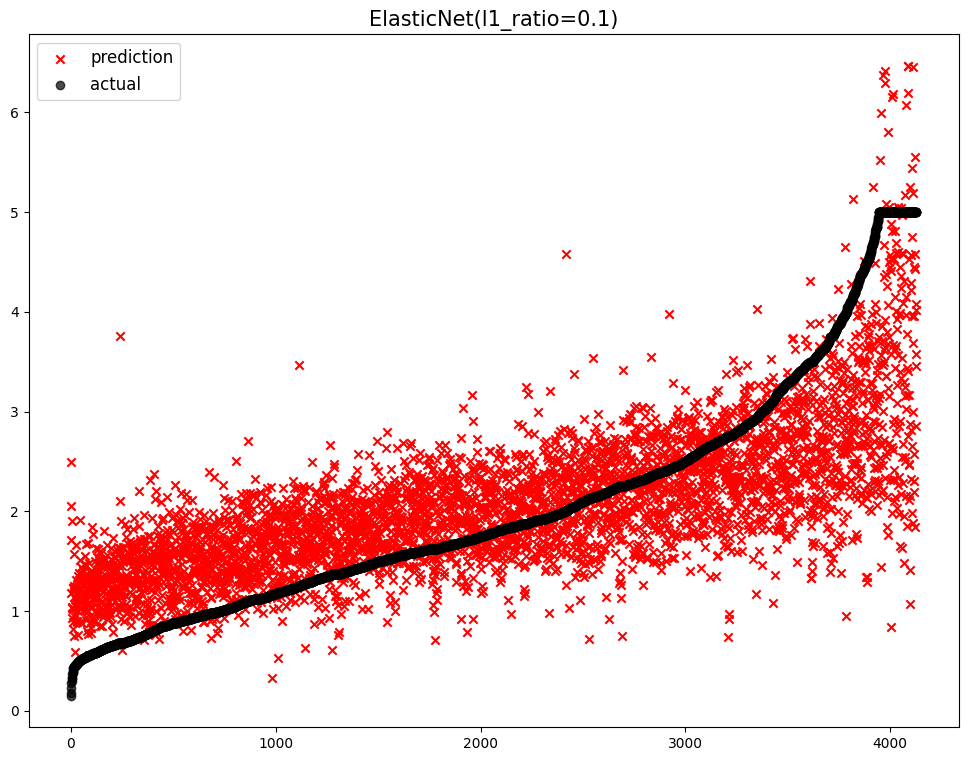

                       model       mse
0            Ridge alpha=100  1.310696
1            Lasso alpha=100  1.310696
2             Ridge alpha=10  1.310227
3             Lasso alpha=10  1.310227
4              Ridge alpha=1  0.938034
5              Lasso alpha=1  0.938034
6   ElasticNet(l1_ratio=0.1)  0.616577
7            Ridge alpha=0.1  0.613512
8            Lasso alpha=0.1  0.613512
9           LinearRegression  0.555892
10        Ridge alpha=0.0001  0.555683
11        Lasso alpha=0.0001  0.555683
12         Ridge alpha=0.001  0.553894
13         Lasso alpha=0.001  0.553894
14          Ridge alpha=0.01  0.544449
15          Lasso alpha=0.01  0.544449


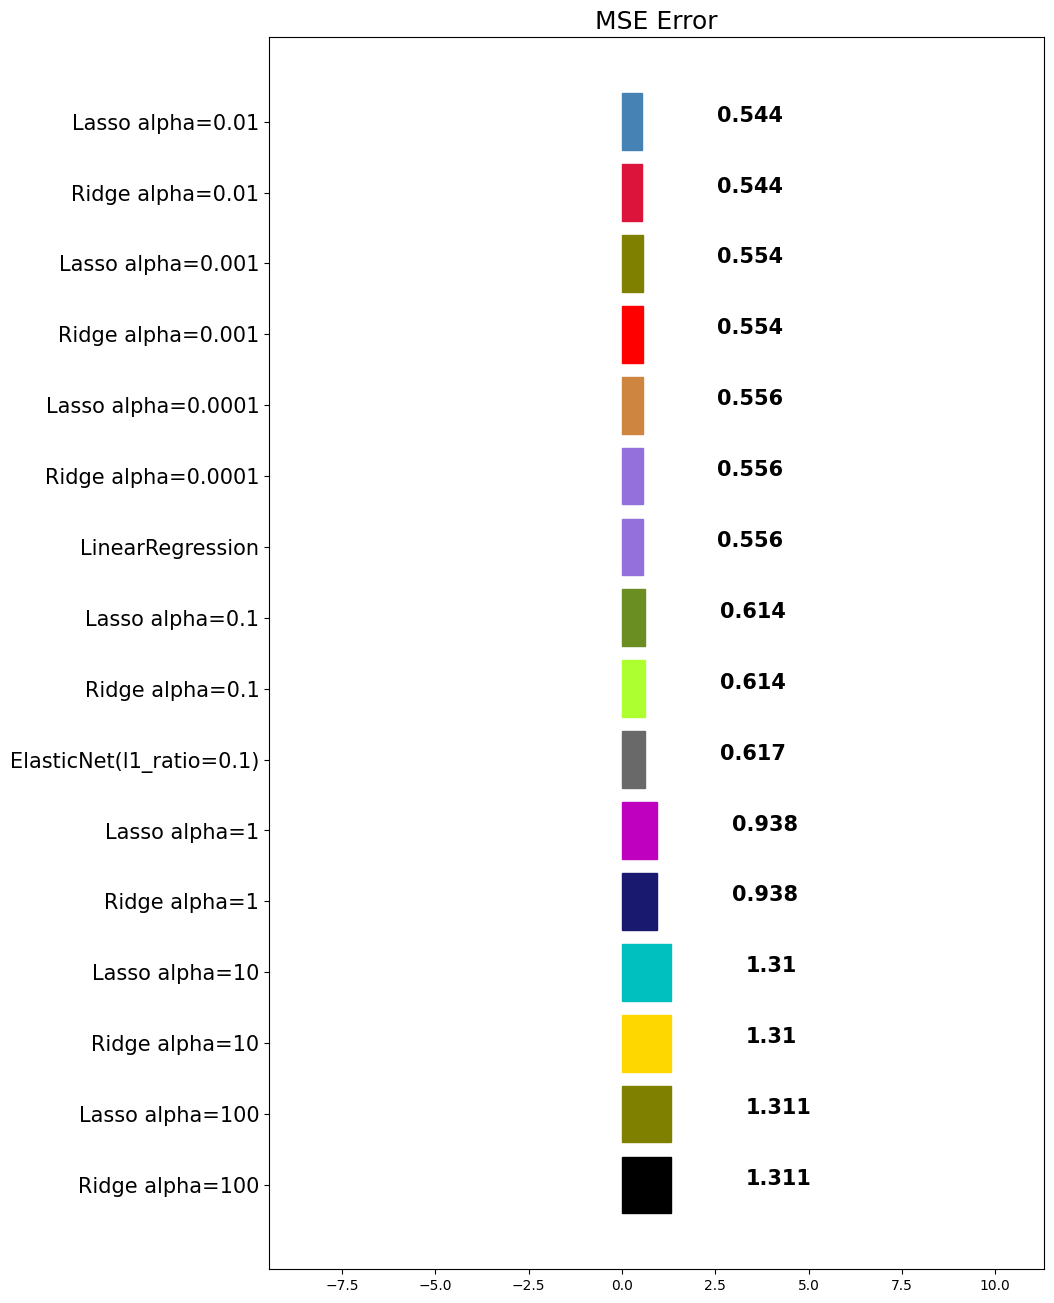

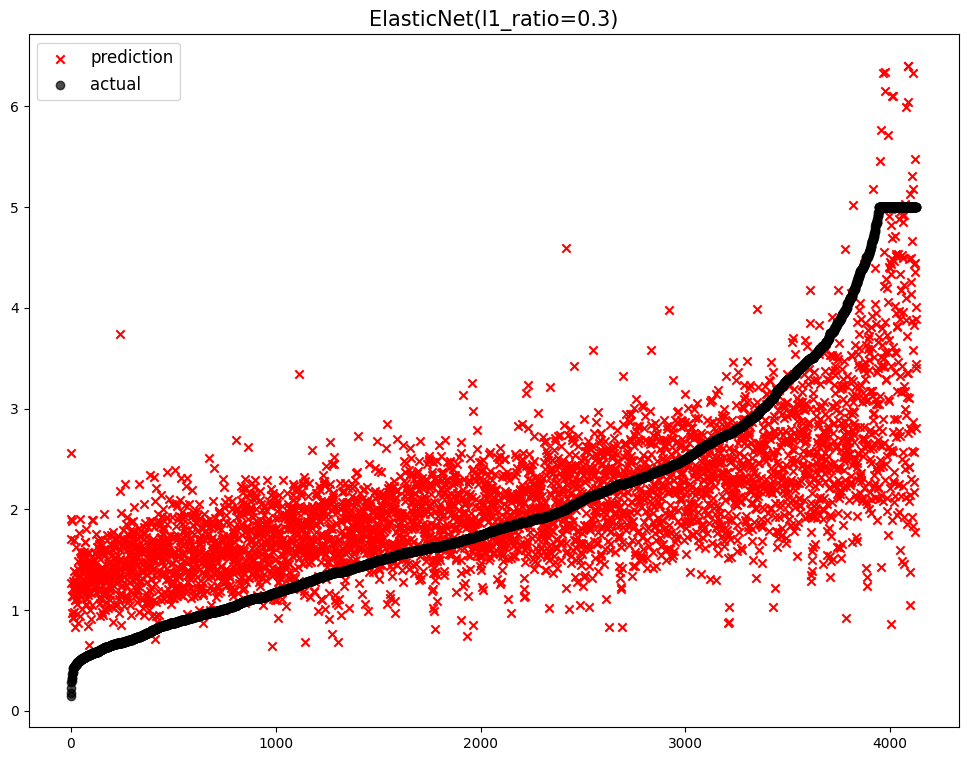

                       model       mse
0            Ridge alpha=100  1.310696
1            Lasso alpha=100  1.310696
2             Ridge alpha=10  1.310227
3             Lasso alpha=10  1.310227
4              Ridge alpha=1  0.938034
5              Lasso alpha=1  0.938034
6   ElasticNet(l1_ratio=0.3)  0.670324
7   ElasticNet(l1_ratio=0.1)  0.616577
8            Ridge alpha=0.1  0.613512
9            Lasso alpha=0.1  0.613512
10          LinearRegression  0.555892
11        Ridge alpha=0.0001  0.555683
12        Lasso alpha=0.0001  0.555683
13         Ridge alpha=0.001  0.553894
14         Lasso alpha=0.001  0.553894
15          Ridge alpha=0.01  0.544449
16          Lasso alpha=0.01  0.544449


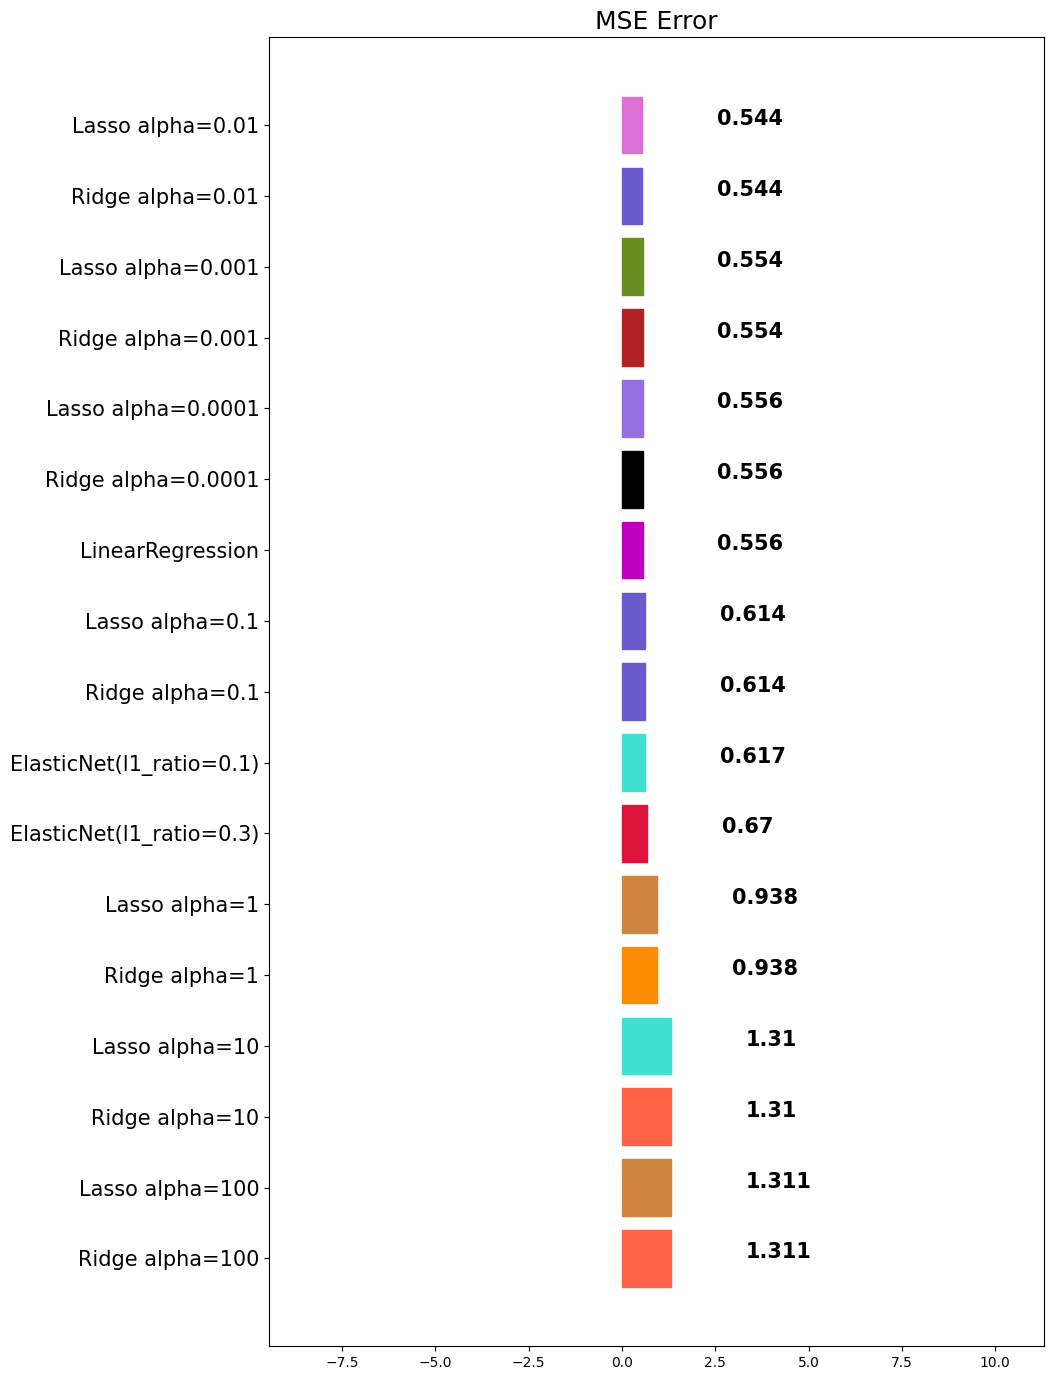

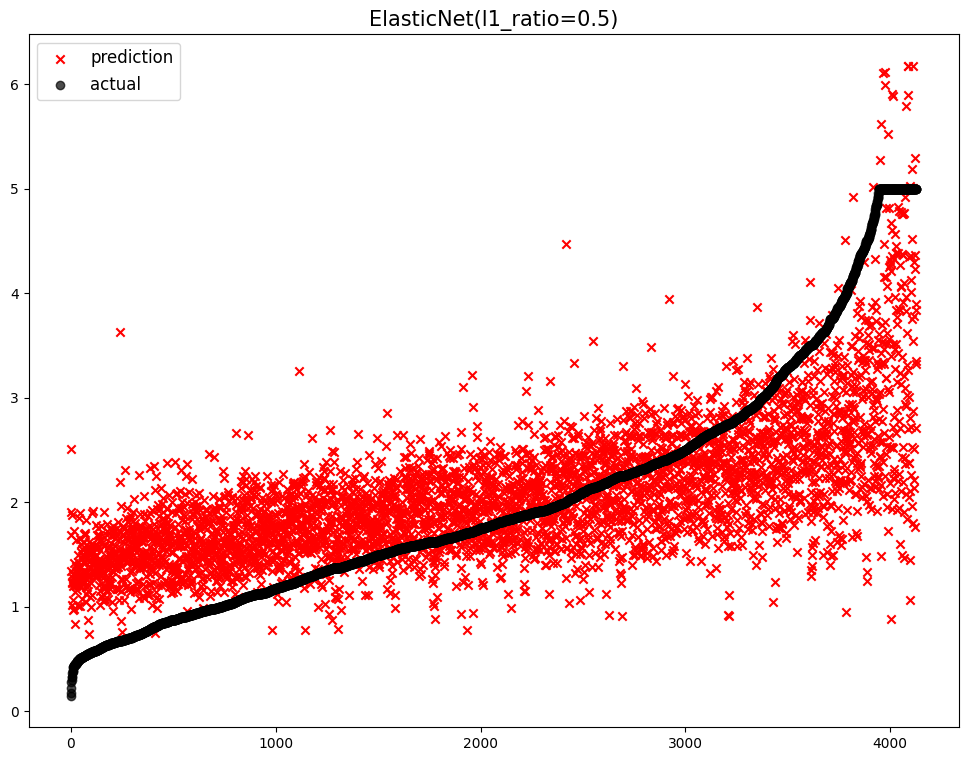

                       model       mse
0            Ridge alpha=100  1.310696
1            Lasso alpha=100  1.310696
2             Ridge alpha=10  1.310227
3             Lasso alpha=10  1.310227
4              Ridge alpha=1  0.938034
5              Lasso alpha=1  0.938034
6   ElasticNet(l1_ratio=0.5)  0.686873
7   ElasticNet(l1_ratio=0.3)  0.670324
8   ElasticNet(l1_ratio=0.1)  0.616577
9            Ridge alpha=0.1  0.613512
10           Lasso alpha=0.1  0.613512
11          LinearRegression  0.555892
12        Ridge alpha=0.0001  0.555683
13        Lasso alpha=0.0001  0.555683
14         Ridge alpha=0.001  0.553894
15         Lasso alpha=0.001  0.553894
16          Ridge alpha=0.01  0.544449
17          Lasso alpha=0.01  0.544449


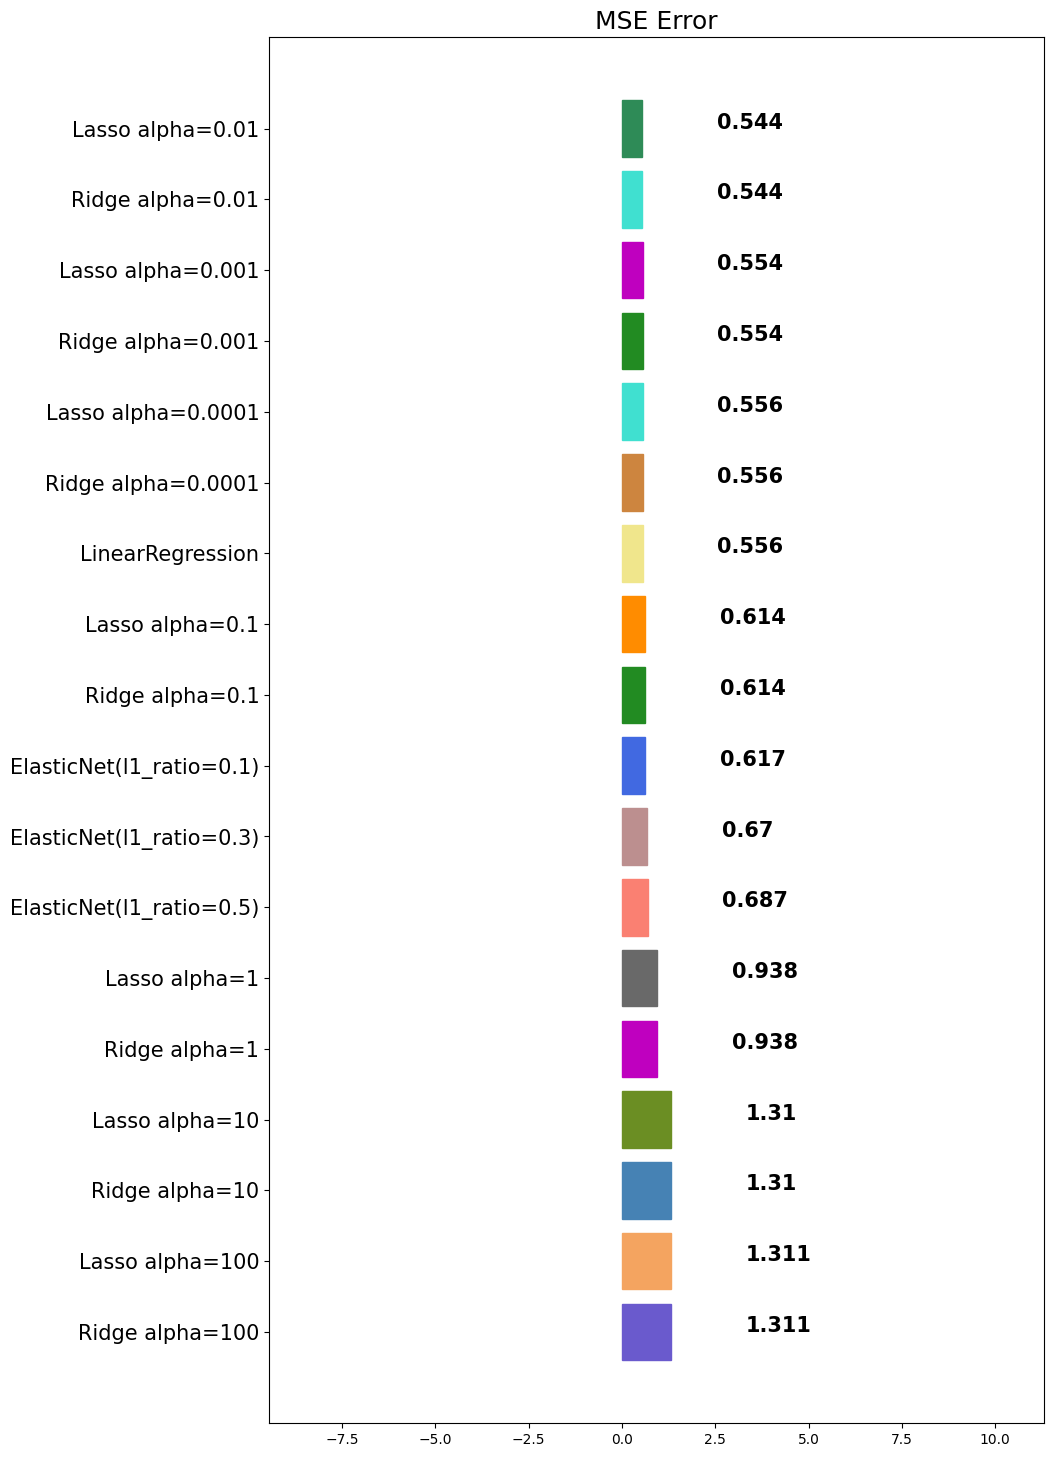

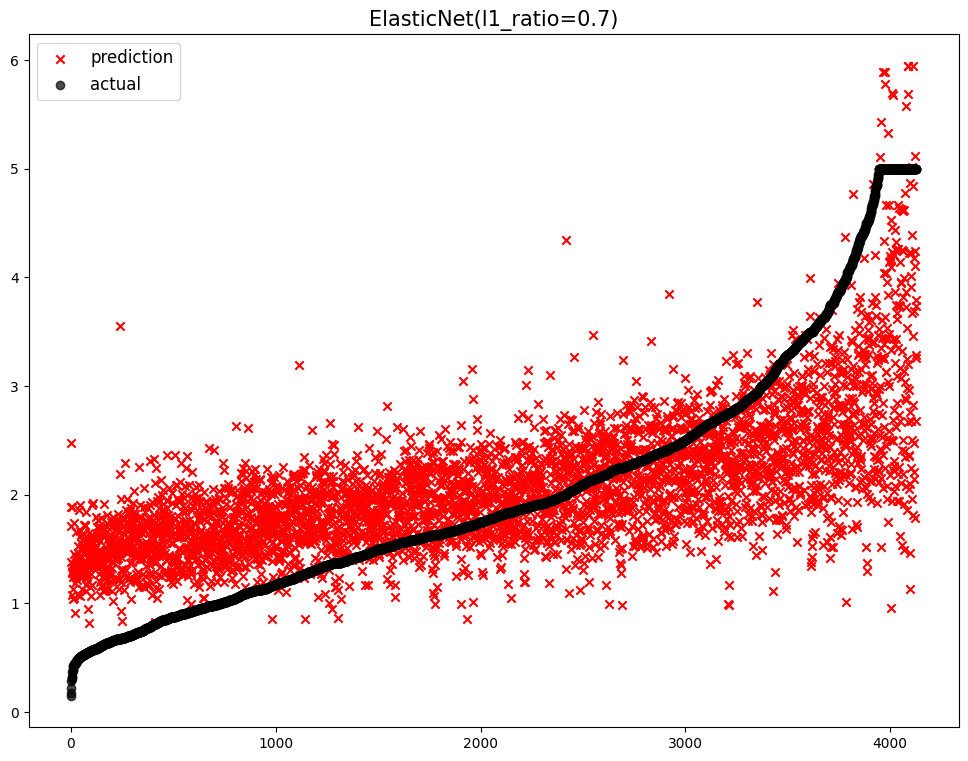

                       model       mse
0            Ridge alpha=100  1.310696
1            Lasso alpha=100  1.310696
2             Ridge alpha=10  1.310227
3             Lasso alpha=10  1.310227
4              Ridge alpha=1  0.938034
5              Lasso alpha=1  0.938034
6   ElasticNet(l1_ratio=0.7)  0.700064
7   ElasticNet(l1_ratio=0.5)  0.686873
8   ElasticNet(l1_ratio=0.3)  0.670324
9   ElasticNet(l1_ratio=0.1)  0.616577
10           Ridge alpha=0.1  0.613512
11           Lasso alpha=0.1  0.613512
12          LinearRegression  0.555892
13        Ridge alpha=0.0001  0.555683
14        Lasso alpha=0.0001  0.555683
15         Ridge alpha=0.001  0.553894
16         Lasso alpha=0.001  0.553894
17          Ridge alpha=0.01  0.544449
18          Lasso alpha=0.01  0.544449


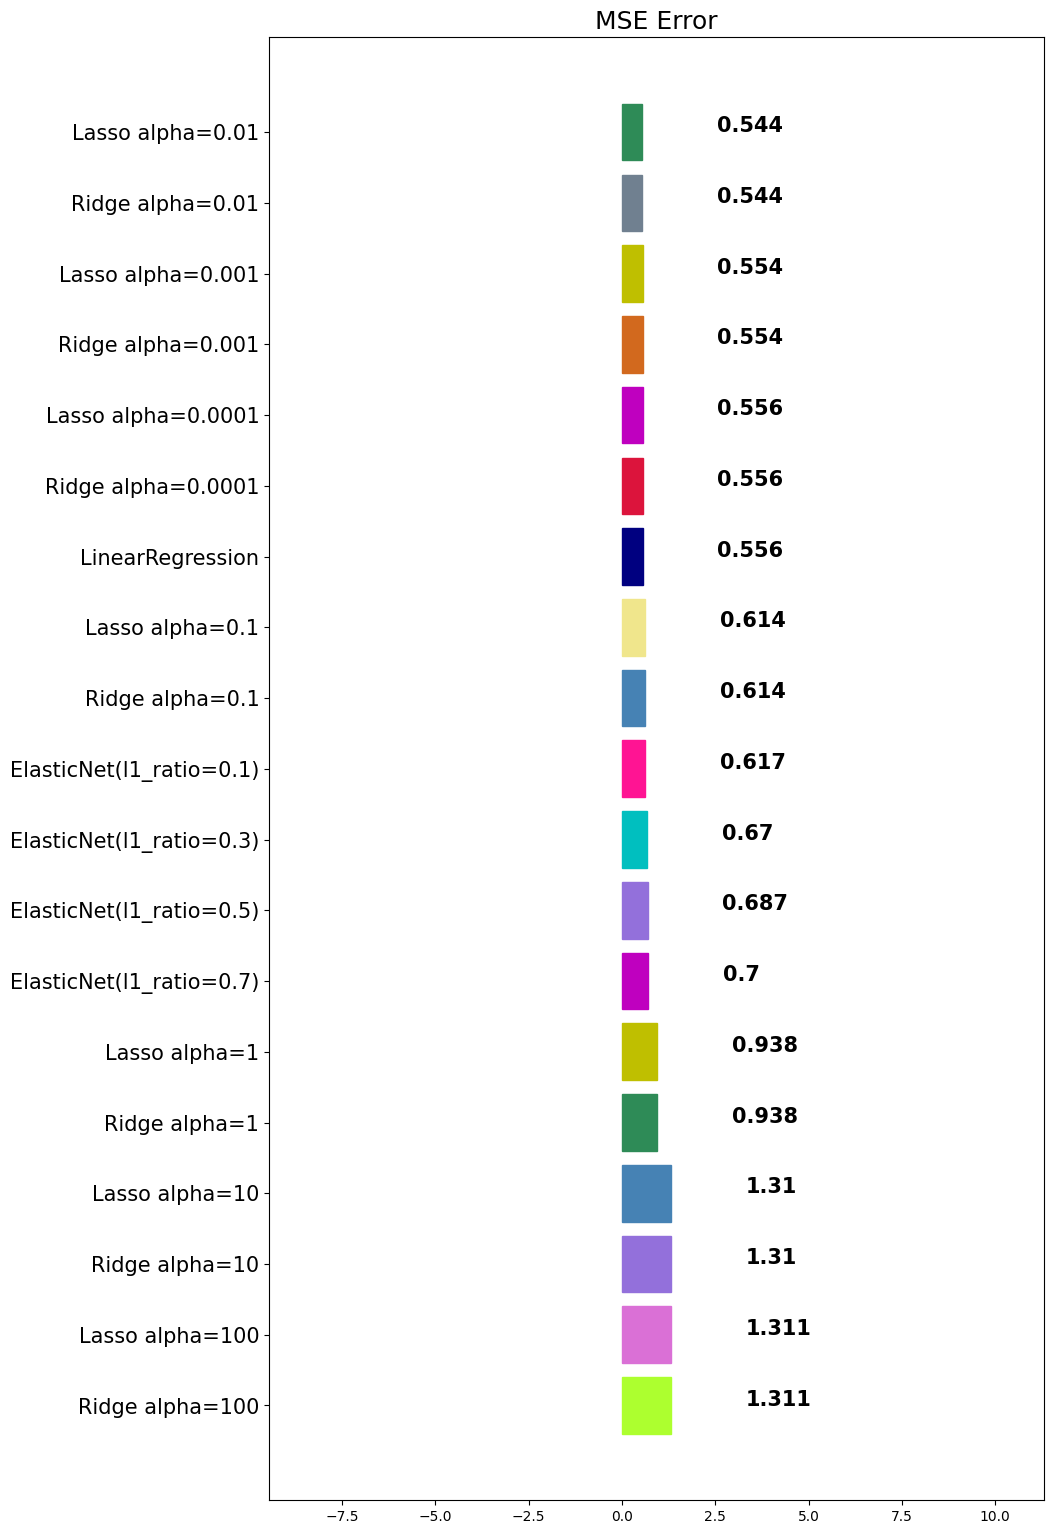

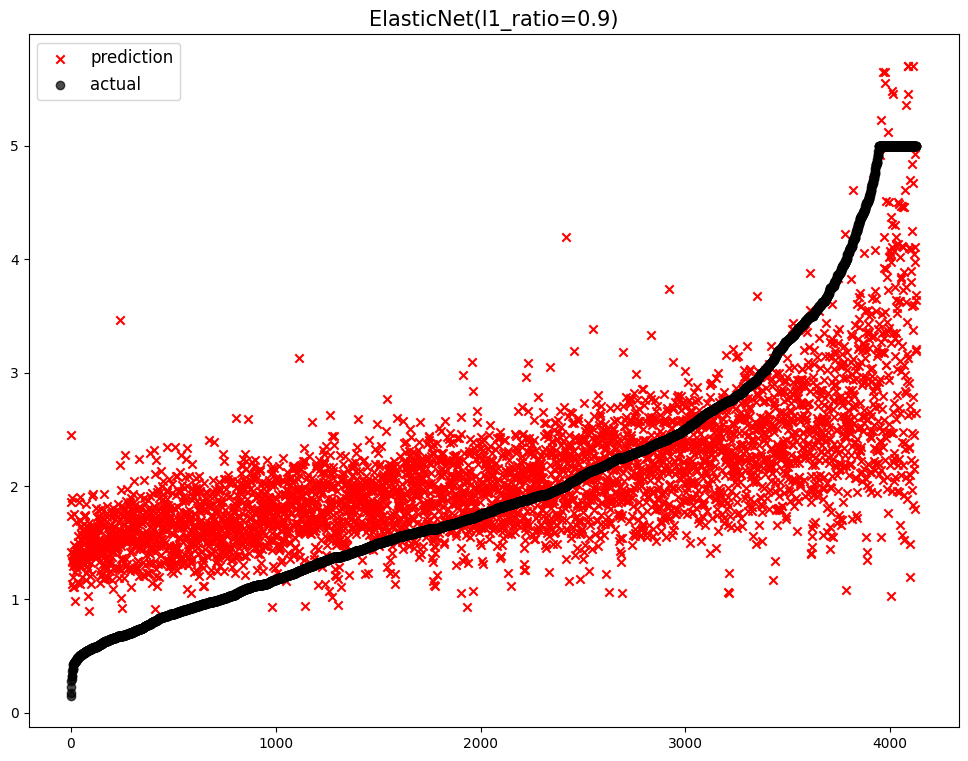

                       model       mse
0            Ridge alpha=100  1.310696
1            Lasso alpha=100  1.310696
2             Ridge alpha=10  1.310227
3             Lasso alpha=10  1.310227
4              Ridge alpha=1  0.938034
5              Lasso alpha=1  0.938034
6   ElasticNet(l1_ratio=0.9)  0.716693
7   ElasticNet(l1_ratio=0.7)  0.700064
8   ElasticNet(l1_ratio=0.5)  0.686873
9   ElasticNet(l1_ratio=0.3)  0.670324
10  ElasticNet(l1_ratio=0.1)  0.616577
11           Ridge alpha=0.1  0.613512
12           Lasso alpha=0.1  0.613512
13          LinearRegression  0.555892
14        Ridge alpha=0.0001  0.555683
15        Lasso alpha=0.0001  0.555683
16         Ridge alpha=0.001  0.553894
17         Lasso alpha=0.001  0.553894
18          Ridge alpha=0.01  0.544449
19          Lasso alpha=0.01  0.544449


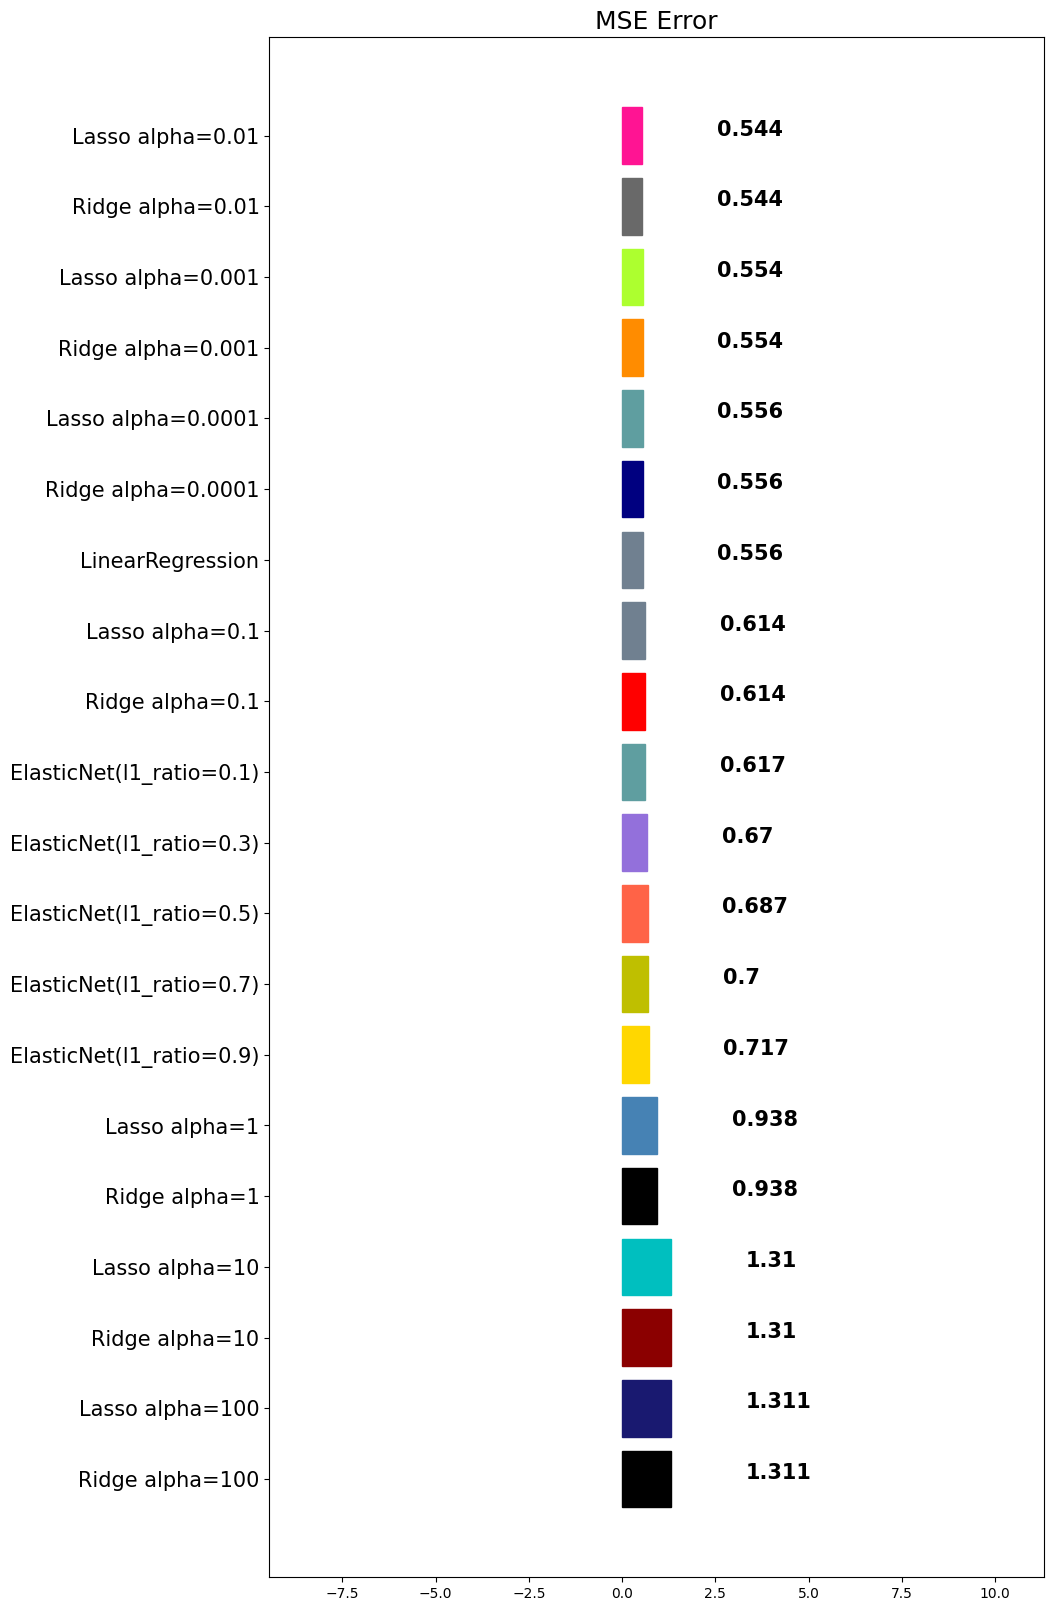

In [32]:
for ratio in ratios:
    elasticnet = ElasticNet(alpha=0.5, l1_ratio=ratio)
    elasticnet.fit(data_train, target_train)
    y_pred = elasticnet.predict(data_test)
    mse_eval('ElasticNet(l1_ratio={})'.format(ratio), y_pred, target_test)

Scaler를 적용

In [33]:
# Outlier에 강한 스케일러 순서 : RobustScaler > StandardScaler > MinMaxScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# 데이터의 통계 분포
data_train.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.880754,28.608285,5.435235,1.096685,1426.453004,3.096961,35.643149,-119.582290
std,1.904294,12.602499,2.387375,0.433215,1137.056380,11.578744,2.136665,2.005654
min,0.499900,1.000000,0.888889,0.333333,3.000000,0.692308,32.550000,-124.350000
25%,2.566700,18.000000,4.452055,1.006508,789.000000,2.428799,33.930000,-121.810000
50%,3.545800,29.000000,5.235874,1.049286,1167.000000,2.817240,34.260000,-118.510000
75%,4.773175,37.000000,6.061037,1.100348,1726.000000,3.280000,37.720000,-118.010000
max,15.000100,52.000000,141.909091,25.636364,35682.000000,1243.333333,41.950000,-114.310000


In [36]:
# StandardScaler를 사용하여 스케일링
std_scaler = StandardScaler()
std_scaled = std_scaler.fit_transform(data_train)

In [38]:
df_std_scaled = pd.DataFrame(std_scaled)
df_std_scaled.describe().round(4)

,0,1,2,3,4,5,6,7
count,16512.0000,16512.0000,16512.0000,16512.0000,16512.0000,16512.0000,16512.0000,16512.0000
mean,-0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-1.7754,-2.1908,-1.9044,-1.7621,-1.2519,-0.2077,-1.4477,-2.3772
25%,-0.6901,-0.8418,-0.4118,-0.2082,-0.5606,-0.0577,-0.8018,-1.1107
50%,-0.1759,0.0311,-0.0835,-0.1094,-0.2282,-0.0242,-0.6474,0.5347
75%,0.4687,0.6659,0.2621,0.0085,0.2634,0.0158,0.9720,0.7840
max,5.8393,1.8562,57.1666,56.6473,30.1274,107.1164,2.9518,2.6288


In [39]:
#MinMaxScaler
minmax_scaler = MinMaxScaler()

#데이터 변환
minmax_scaled = minmax_scaler.fit_transform(data_train)

print("Min-Max Scaling 결과:")
df_minmax_scaled =pd.DataFrame(data=minmax_scaled)
df_minmax_scaled.describe().round(4)

Min-Max Scaling 결과:


,0,1,2,3,4,5,6,7
count,16512.0000,16512.0000,16512.0000,16512.0000,16512.0000,16512.0000,16512.0000,16512.0000
mean,0.2332,0.5413,0.0322,0.0302,0.0399,0.0019,0.3291,0.4749
std,0.1313,0.2471,0.0169,0.0171,0.0319,0.0093,0.2273,0.1998
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.1425,0.3333,0.0253,0.0266,0.0220,0.0014,0.1468,0.2530
50%,0.2101,0.5490,0.0308,0.0283,0.0326,0.0017,0.1819,0.5817
75%,0.2947,0.7059,0.0367,0.0303,0.0483,0.0021,0.5500,0.6315
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [40]:
#MinMaxScaler
robust_scaler = RobustScaler()

#데이터 변환
robust_scaled = robust_scaler.fit_transform(data_train)

print("Min-Max Scaling 결과:")
df_robust_scaled =pd.DataFrame(data=robust_scaled)
df_robust_scaled.describe().round(4)

Min-Max Scaling 결과:


,0,1,2,3,4,5,6,7
count,16512.0000,16512.0000,16512.0000,16512.0000,16512.0000,16512.0000,16512.0000,16512.0000
mean,0.1518,-0.0206,0.1239,0.5051,0.2769,0.3286,0.3649,-0.2822
std,0.8630,0.6633,1.4838,4.6165,1.2135,13.6028,0.5638,0.5278
min,-1.3804,-1.4737,-2.7017,-7.6295,-1.2423,-2.4964,-0.4512,-1.5368
25%,-0.4437,-0.5789,-0.4872,-0.4559,-0.4034,-0.4563,-0.0871,-0.8684
50%,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,0.5563,0.4211,0.5128,0.5441,0.5966,0.5437,0.9129,0.1316
max,5.1912,1.2105,84.9439,262.0108,36.8356,1457.3714,2.0290,1.1053


### 여러 가지 조합을 만들기
wake_pipelie을 사용하여 조합 만들기
1. StandaradScaler + ElasticNet(l1_ratio=0.1)
2. RobustScaler + ElasticNet(l1_ratio=0.1)
3. minmaxScaler + ElasticNet(l1_ratio=0.1)
4.  다항 회귀

In [44]:
from sklearn.pipeline import Pipeline

std_scaled_elastic_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('elasticnet', ElasticNet(alpha=0.5, l1_ratio=0.1, max_iter=10000))
])

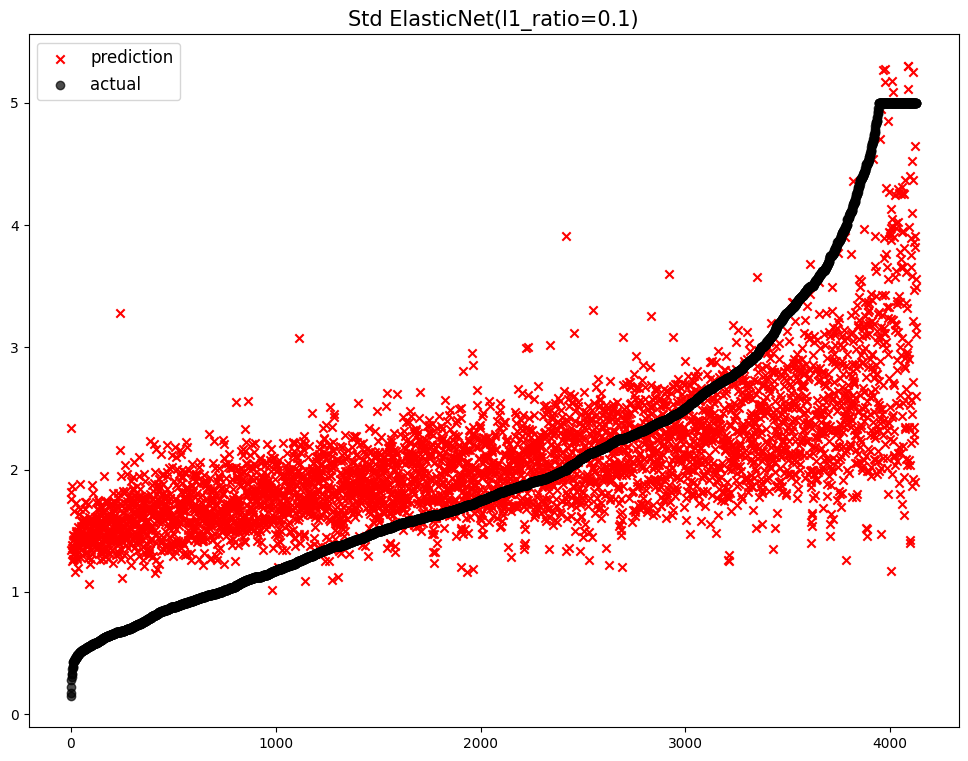

                           model       mse
0                Ridge alpha=100  1.310696
1                Lasso alpha=100  1.310696
2                 Ridge alpha=10  1.310227
3                 Lasso alpha=10  1.310227
4                  Ridge alpha=1  0.938034
5                  Lasso alpha=1  0.938034
6   Std ElasticNet(l1_ratio=0.1)  0.732531
7       ElasticNet(l1_ratio=0.9)  0.716693
8       ElasticNet(l1_ratio=0.7)  0.700064
9       ElasticNet(l1_ratio=0.5)  0.686873
10      ElasticNet(l1_ratio=0.3)  0.670324
11      ElasticNet(l1_ratio=0.1)  0.616577
12               Ridge alpha=0.1  0.613512
13               Lasso alpha=0.1  0.613512
14              LinearRegression  0.555892
15            Ridge alpha=0.0001  0.555683
16            Lasso alpha=0.0001  0.555683
17             Ridge alpha=0.001  0.553894
18             Lasso alpha=0.001  0.553894
19              Ridge alpha=0.01  0.544449
20              Lasso alpha=0.01  0.544449


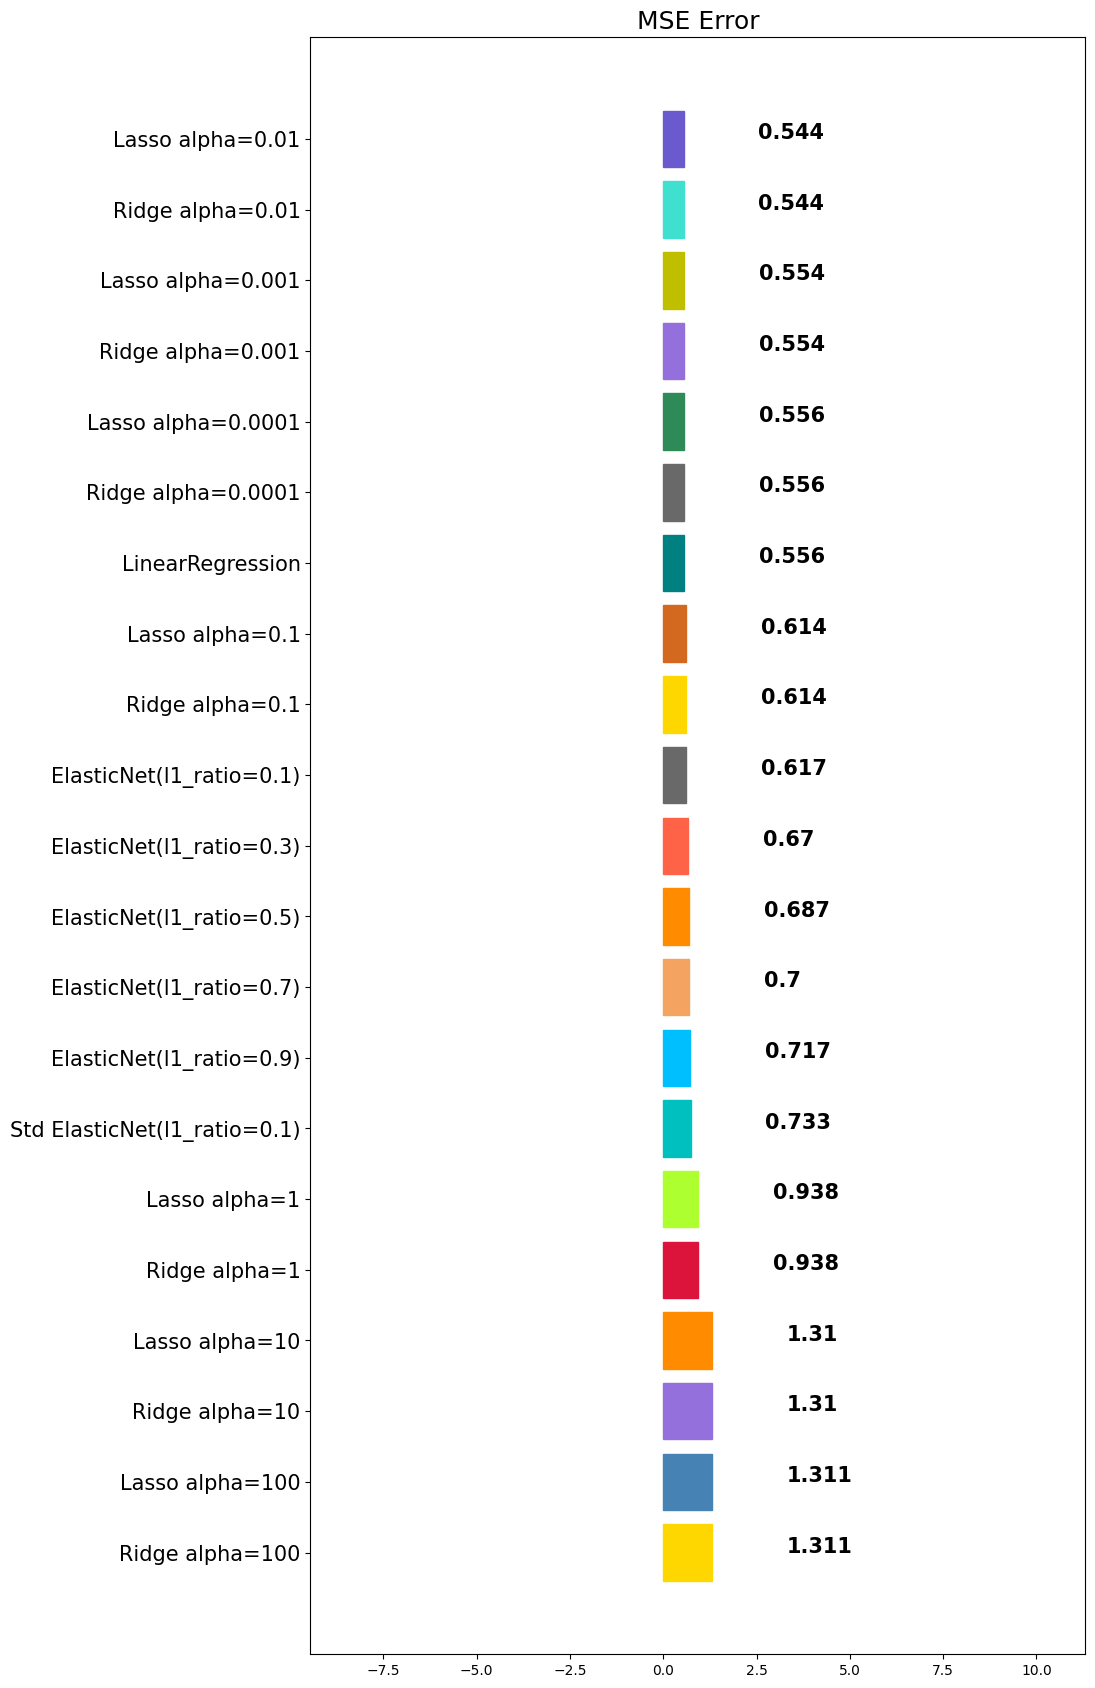

In [45]:
# 2. 파이프라인(모델) 학습
std_scaled_elastic_pipeline.fit(data_train, target_train)

# 3. 파이프라인 예측
y_pred = std_scaled_elastic_pipeline.predict(data_test)

# 4. 파이프라인 평가
mse_eval('Std ElasticNet(l1_ratio=0.1)', y_pred, target_test)

In [ ]:
from sklearn.pipeline import Pipeline

# 1. 파이프라인 생성
minmax_scal